Μπεκιάρης Χαράλαμπος

Σχολή ΕΜΦΕ

Α.Μ.: ge18088

# Παραδοτέο 1
## Ερώτημα 1

Κάθε φορά πραγματοποιούμε περίπατο γύρο από την κατάσταση $Χ_{0}=1$. Ο χρόνος επιστροφής στην κατάσταση 1, ${Τ_{1}}^{+}$ είναι μία τυχαία μεταβλητή και μπορούμε να το αντιμετωπίσουμε ως χρόνος διακοπής. Τότε από ισχυρή μαρκοβιανή ιδιότητα η αλυσίδα {$Y_{n}=Χ_{n+{T_{1}}^{+}}$} είναι M.C. με ίδιο πίνακα μεταβάσεων και από μαρκοβιανή ιδιότητα είναι ανεξάρτητη του παρελθόντως. Με βάση το Θεώρημα 20, η κάθε μια αλυσίδα $Υ_{n}$ έχει την ίδια αναλλοίωτη με την αρχική αλυσίδα $Χ_{n}$, επομένως δεν χρειάζεται να ξεκινήσουμε νέα αλυσίδα κάθε φορά που βρίσκεται στην κατάσταση 1, καθώς είναι ήδη ανεξάρτητες.

## Ερώτημα 2

In [9]:
from simple_markov_chain_lib import markov_chain

## Build Markov Chain
markov_table = {
    1: {2: 0.5, 3: 0.5},
    2: {1: 1/3, 4: 2/3},
    3: {3: 0.8, 4: 0.2},
    4: {1: 0.6, 4: 0.4}
}

init_dist = {1: 1.0} #the chain starts from state 1 since we are interested in excursions around state 1.

mc = markov_chain(markov_table, init_dist)

N = 100_000

##Initialize the dictionary "visits". Every state is a key of this dictionary, with value 0
visits = {state: 0 for state in (1, 2, 3, 4)} 

mc.start()
completed = 0

##Simulate N excursions. Every time we complete an excursion we increase completed by 1.
while completed < N:
    visits[mc.running_state] += 1
    mc.move()
    if mc.running_state == 1:
        completed +=1

print("Expected Visits starting from 1:")
Ex = sum(visits.values())/N #18/97
for x, y in visits.items():
    print("π({}) = {}".format(x, 1/Ex * y/N))

Expected Visits starting from 1:
π(1) = 0.18576760101577725
π(2) = 0.09276490924323852
π(3) = 0.4632356629209726
π(4) = 0.2582318268200116


Τρέχοντας τον παραπάνω κώδικα αρκετές φορές, βλέπουμε ότι έχουμε πετύχει ακρίβεια 2 δεκαδικών. Θεωρητικά περιμέναμε κατανομή: $$π \thickapprox (0.1856, 0.0928, 0.4639, 0.2577) $$

## Ερώτημα 3

Σε κάθε περίπτωση, όπως ήταν θεωρητικά αναμενόμενο, η αναλοίωτη κατανομή δεν επηρεάζεται από την αρχική κατάσταση της αλυσίδας

### Ξεκινώντας από την κατάσταση 2:

In [3]:

init_dist = {2: 1.0} #the chain starts from state 1 since we are interested in excursions around state 1.


while completed < N:
    visits[mc.running_state] += 1
    mc.move()
    if mc.running_state == 2:
        completed +=1



Expected Visits starting from 2:
π(1) = 0.18558743011195983
π(2) = 0.09264363237153803
π(3) = 0.46340252268610954
π(4) = 0.2583664148303927


### Ξεκινώντας από την κατάσταση 3:

In [2]:

init_dist = {3: 1.0} #the chain starts from state 1 since we are interested in excursions around state 1.


while completed < N:
    visits[mc.running_state] += 1
    mc.move()
    if mc.running_state == 3:
        completed +=1



Expected Visits starting from 3:
π(1) = 0.1858642867734282
π(2) = 0.09304103647686832
π(3) = 0.46337485172004744
π(4) = 0.25771982502965596


### Ξεκινώντας από την κατάσταση 4:

In [1]:

init_dist = {4: 1.0} #the chain starts from state 1 since we are interested in excursions around state 1.


while completed < N:
    visits[mc.running_state] += 1
    mc.move()
    if mc.running_state == 4:
        completed +=1



Expected Visits starting from 4:
π(1) = 0.1850473012434425
π(2) = 0.09223292228291212
π(3) = 0.4654380607133393
π(4) = 0.25728171576030606


# Παραδοτέο 2

## Ερώτημα 1

Έστω $N$ το πλήθος των σημείων στον κύβο $S$ με πλευρά $2$ και κέντρο το $(0,0,0)$. Έστω $Nhits$ το πλήθος των σημείων που ανήκουν στην μοναδιαία σφαίρα $V$.

$$\frac{Nhits}{N}\thickapprox\frac{|\, V\,|}{|\, S\,|}\Rightarrow|\, V\,|\thickapprox8*\frac{Nhits}{N}$$

Για το σχετικό σφάλμα έχουμε ότι :

$$\frac{Nhits}{N}\thickapprox\frac{|\, V\,|}{|\, S\,|}=\frac{\frac{4π}{3}}{8}=\frac{π}{6}$$

Επομένως :
$$e\% = 100*|\,1-\frac{6}{π}\frac{Nhits}{N}\,|$$

In [4]:
from numpy import random, pi

# Parameters
N = 1_000_000  # number of required points
Nhits = 0
acc_x, acc_y, acc_z = [], [], []  # accepted x, y, z
rej_x, rej_y, rej_z = [], [], []  # rejected x, y, z

# Rejection Sampling
for i in range(N):
    x, y, z = random.uniform(-1, 1, 3)
    if x**2 + y**2 + z**2 < 1:
        acc_x.append(x)
        acc_y.append(y)
        acc_y.append(z)
        Nhits += 1
    else:
        rej_x.append(x)
        rej_y.append(y)
        rej_z.append(z)

print("Total number of samples drawn %d" % Nhits)
print("Number of samples in the disk %d" % N)

Vest = 8 * Nhits / N
Vact = 4*pi/3
print("Monte Carlo estimator of Unitary Sphere Volume: %.5f" % Vest)
print("Actual volume of Unitary Sphere: %.5f" % Vact)
print("The relative error is %.5f%%" % (100 * abs(1- (6 * Nhits)/(pi * N))))


Total number of samples drawn 523234
Number of samples in the disk 1000000
Monte Carlo estimator of Unitary Sphere Volume: 4.18587
Actual volume of Unitary Sphere: 4.18879
The relative error is 0.06967%


## Ερώτημα 2

Total number of samples drawn 19915


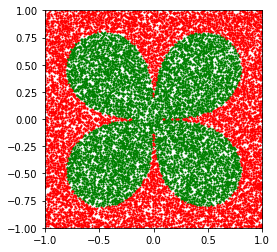

In [9]:
# Parameters
N = 10_000  # number of required points
Ntrials, Nhits = 0, 0
acc_x, acc_y = [], []  # accepted x, y
rej_x, rej_y = [], []  # rejected x, y

# Rejection Sampling
while Nhits < N:
    Ntrials += 1
    x, y = random.uniform(-1, 1, 2)
    if (x**2 + y**2)**2 < 2*abs(x*y):
        acc_x.append(x)
        acc_y.append(y)
        Nhits += 1
    else:
        rej_x.append(x)
        rej_y.append(y)

print("Total number of samples drawn %d" % Ntrials)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.scatter(acc_x, acc_y, color = 'green', s = 1) # parameter s determines the size of each dot in the scatter plot
plt.scatter(rej_x, rej_y, color = 'red', s = 1)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')  # set aspect ratio 1:1

plt.show()

## Ερώτημα 3

Tα σημεία τυχαία ζεύγη (x,y) μπορούμε να τα φανταστούμε ότι είναι τυχαίες μεταβλητές (Χ,Υ). Επομένως η W=|X+Y| είναι επίσης τ.μ. και μπορούμε να εκτιμήσουμε την μέση τιμή της E, με την μέθοδο του Monte-Carlo.

Αφού $Ι/|L| = E$, τότε $Ι = Ε * |L|$. 

To εμβαδόν του λημνίσκου |L| υπολογίζεται εύκολα, παίρνοντας τον λόγο του πλήθους των σημείων που ανήκουν στο L και των σημείων μέσα στο τετράγωνο πλευράς 2 με κέντρο το (0,0).

$$\frac{Nhits}{Ntrials}\thickapprox\frac{|\, L\,|}{|\, S\,|}\Rightarrow|\, L\,|\thickapprox4*\frac{Nhits}{Ntrials}$$

In [10]:
Volume = 4 * Nhits/Ntrials

w = [ abs(acc_x[i]+acc_y[i]) for i in range(10_000) ]
mean = sum(w)/10_000

I = Volume * mean
print("Motne-Carlo estimation of integral I: {}".format(I)) 

Motne-Carlo estimation of integral I: 0.9923477923012765
